# Training the Poker Agent

In this notebook you can train the poker agent for 3-card or 4-card games. You must train the poker agent and save it before using it for playing games.

This is not necessary, if you have the RL model saved in the rl_models folder, where it is saved by default. We track the .plk file with git because the size of the file is very small but it takes a lot of time to redo the training.

Before training the poker agent, make sure that you created a file "token_key.txt" (in the main folder) that contains the token.

## 3-card Kuhn Poker

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime
import os
from model import load_training_data

def build_model():
    """
    Prepare the model.

    Returns
    -------
    model : model class
        Model definition (untrained).
    """
    model = Sequential()

    # First conv layer with ReLU + max pooling
    model.add(Conv2D(32, (3, 3), activation='relu', strides=1, padding='same', input_shape=(32, 32, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second conv layer with ReLU + max pooling, bigger filter
    model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third conv layer with ReLU + max pooling, bigger filter
    model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten output before fully connected
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))

    # Dropout for regularization after fully connected
    model.add(Dropout(0.5))

    # Output Layer - 4 classes (J, Q, K, A)
    model.add(Dense(4, activation='softmax'))

    return model

def train_model(model, n_validation, write_to_file=False):
    """
    Fit the model on the training data set.

    Arguments
    ---------
    model : model class
        Model structure to fit, as defined by build_model().
    n_validation : int
        Number of training examples used for cross-validation.
    write_to_file : bool
        Write model to file; can later be loaded through load_model().

    Returns
    -------
    model : model class
        The trained model.
    """
    # Load training and validation data
    training_images, training_labels, validation_images, validation_labels = load_training_data('dataset/dataset_4ranks_15000.npz')

    # Compile model for training
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Setup early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    # Model training
    history = model.fit(
        training_images,
        training_labels,
        batch_size=64,
        epochs=5,
        verbose=2,
        validation_data=(validation_images, validation_labels),
        callbacks=[early_stopping]
    )

    # Save model to file if requested
    if write_to_file:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        os.makedirs('./models', exist_ok=True)  # Create the directory if it doesn't exist
        model.save(f'./models/model_{timestamp}.keras')

    return model

# Example of using the functions
if __name__ == "__main__":
    model = build_model()
    trained_model = train_model(model, n_validation=3000, write_to_file=True)
    print("Training complete. Model saved.")


Epoch 1/5
188/188 - 11s - loss: 0.1639 - accuracy: 0.9444 - val_loss: 9.5530e-04 - val_accuracy: 1.0000 - 11s/epoch - 57ms/step
Epoch 2/5
188/188 - 10s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.5305e-04 - val_accuracy: 1.0000 - 10s/epoch - 53ms/step
Epoch 3/5
188/188 - 10s - loss: 3.1041e-04 - accuracy: 1.0000 - val_loss: 1.5441e-04 - val_accuracy: 1.0000 - 10s/epoch - 52ms/step
Epoch 4/5
188/188 - 10s - loss: 1.3868e-04 - accuracy: 1.0000 - val_loss: 3.0561e-05 - val_accuracy: 1.0000 - 10s/epoch - 55ms/step
Epoch 5/5
188/188 - 11s - loss: 6.2690e-05 - accuracy: 1.0000 - val_loss: 3.6391e-05 - val_accuracy: 1.0000 - 11s/epoch - 56ms/step
Training complete. Model saved.


In [1]:
from rl_model import *
from agent import *

#Initialize the agent with 3 cards
poker_agent = PokerAgent(num_cards=3)

# Extract the RL agent from the PokerAgent object
rl_agent=poker_agent.rl_agent

# Train the RL agent
train(rl_agent, num_games=1000)

2024-10-25 00:58:11.792570: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The connection has been established
Coordinator ID has been updated by the server: 831d097d-e28d-4334-b158-667d20637008. Report this ID to your teacher in case of any problems with the game.

New round is starting!
1/1 [==============================] - 0s 145ms/step
Prediction [A J K Q] = [0. 0. 1. 0.]
----- Round 1 results -----
  Recognized card : K
  Your turn order : 2
  Moves history   : ['CHECK', 'BET', 'CALL']
  Your outcome    : 2
  Current bank    : 7
  Show-down       : JK
New round is starting!
1/1 [==============================] - 0s 21ms/step
Prediction [A J K Q] = [0. 0. 1. 0.]
----- Round 2 results -----
  Recognized card : K
  Your turn order : 1
  Moves history   : ['BET', 'CALL']
  Your outcome    : 2
  Current bank    : 9
  Show-down       : KJ
New round is starting!
1/1 [==============================] - 0s 23ms/step
Prediction [A J K Q] = [0.    0.005 0.995 0.   ]
----- Round 3 results -----
  Recognized card : K
  Your turn order : 2
  Moves history   : ['CHECK'

In [5]:
# Save the RL model obtained after training
save_rl_model(rl_agent.rl_model, num_cards=3)

# You can load the RL model using this command
load_rl_model(num_cards=3)

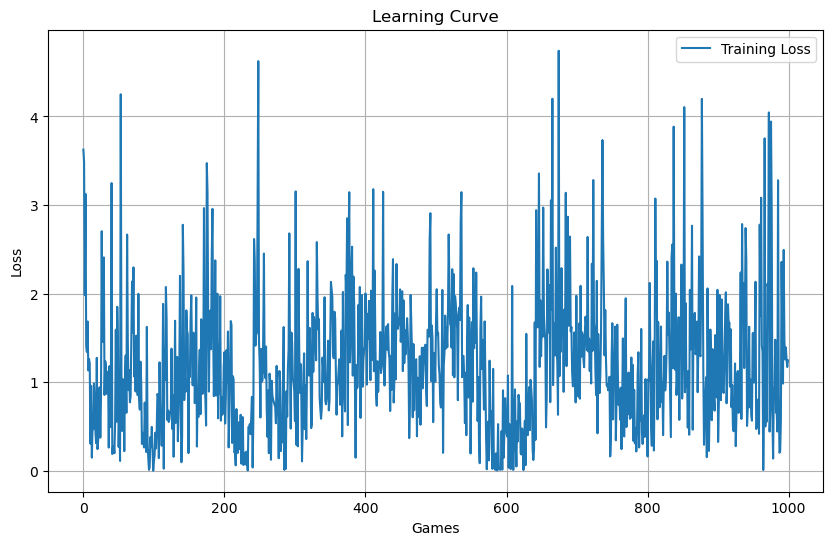

In [3]:
# Plot the learning curve: Loss VS Games
rl_agent.plot_learning_curve()

In [6]:
# Returns the win rate after playing for example 10 games
evaluate(rl_agent, num_games=10)

The connection has been established
Coordinator ID has been updated by the server: bf2b8966-ec54-48b1-9cff-ca804990db7d. Report this ID to your teacher in case of any problems with the game.

New round is starting!
1/1 [==============================] - 0s 267ms/step
Prediction [A J K Q] = [1. 0. 0. 0.]
----- Round 1 results -----
  Recognized card : Q
  Your turn order : 1
  Moves history   : ['BET', 'CALL']
  Your outcome    : 2
  Current bank    : 7
  Show-down       : AJ
New round is starting!
1/1 [==============================] - 0s 40ms/step
Prediction [A J K Q] = [1. 0. 0. 0.]
----- Round 2 results -----
  Recognized card : K
  Your turn order : 2
  Moves history   : ['CHECK', 'CHECK']
  Your outcome    : 1
  Current bank    : 8
  Show-down       : KA
New round is starting!
1/1 [==============================] - 0s 46ms/step
Prediction [A J K Q] = [0. 1. 0. 0.]
----- Round 3 results -----
  Recognized card : J
  Your turn order : 1
  Moves history   : ['BET', 'FOLD']
  Your out

0.8

## 4-card Kuhn Poker

In [8]:
from rl_model import *
from agent import *

#Initialize the agent with 4 cards
poker_agent = PokerAgent(num_cards=4)

# Extract the RL agent from the PokerAgent object
rl_agent=poker_agent.rl_agent

# Train the RL agent
train(rl_agent, num_games=250)

The connection has been established
Coordinator ID has been updated by the server: 4b771b24-0aad-4fc1-8503-eefe5a2d7654. Report this ID to your teacher in case of any problems with the game.

New round is starting!
1/1 [==============================] - 0s 87ms/step
Prediction [A J K Q] = [0. 1. 0. 0.]
----- Round 1 results -----
  Recognized card : J
  Your turn order : 2
  Moves history   : ['BET', 'CALL']
  Your outcome    : -2
  Current bank    : 3
  Show-down       : AJ
New round is starting!
1/1 [==============================] - 0s 25ms/step
Prediction [A J K Q] = [1. 0. 0. 0.]
----- Round 2 results -----
  Recognized card : J
  Your turn order : 1
  Moves history   : ['BET', 'CALL']
  Your outcome    : 2
  Current bank    : 5
  Show-down       : AQ
New round is starting!
1/1 [==============================] - 0s 42ms/step
Prediction [A J K Q] = [0. 1. 0. 0.]
----- Round 3 results -----
  Recognized card : J
  Your turn order : 2
  Moves history   : ['CHECK', 'BET', 'FOLD']
  Yo

In [9]:
# Save the RL model obtained after training
save_rl_model(rl_agent.rl_model, num_cards=4)

# You can load the RL model using this command
load_rl_model(num_cards=4)

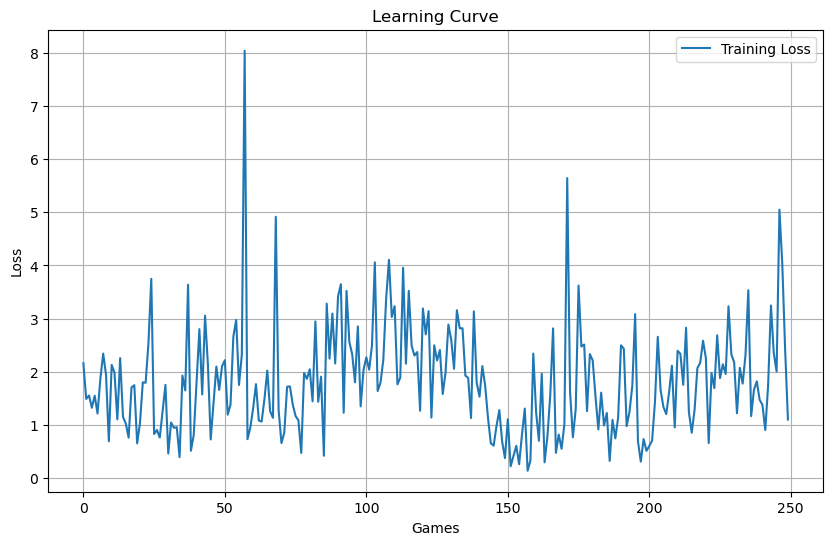

In [10]:
# Plot the learning curve: Loss VS Games
rl_agent.plot_learning_curve()

In [12]:
# Returns the win rate after playing for example 10 games
evaluate(rl_agent, num_games=10)

The connection has been established
Coordinator ID has been updated by the server: e1c0ea2f-cc4d-433f-b4d6-eb73c9d9b9d1. Report this ID to your teacher in case of any problems with the game.

New round is starting!
1/1 [==============================] - 0s 102ms/step
Prediction [A J K Q] = [1. 0. 0. 0.]
----- Round 1 results -----
  Recognized card : K
  Your turn order : 2
  Moves history   : ['CHECK', 'CHECK']
  Your outcome    : 1
  Current bank    : 6
  Show-down       : KA
New round is starting!
1/1 [==============================] - 0s 25ms/step
Prediction [A J K Q] = [0. 0. 1. 0.]
----- Round 2 results -----
  Recognized card : K
  Your turn order : 1
  Moves history   : ['CHECK', 'CHECK']
  Your outcome    : 1
  Current bank    : 7
  Show-down       : KQ
New round is starting!
1/1 [==============================] - 0s 37ms/step
Prediction [A J K Q] = [1. 0. 0. 0.]
----- Round 3 results -----
  Recognized card : J
  Your turn order : 2
  Moves history   : ['BET', 'FOLD']
  Your 

0.2